## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "kobe"
hashtag = "神戸" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "23-23"
tau = 43
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(43, '神戸', 20137)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
神戸,20136
kobe,4992
三宮,4002
兵庫,2964
元町,2322
...,...
いつでもコーヒー,1
apプロ,1
balletstudiosora,1
theflavordesign,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['だらだらトーク定例会', '짜파게티', 'いつでもコーヒー', '豆皿小皿食卓とワイン', 'theflavordesign', 'balletstudiosora', 'ランチ💕', '花耶', 'イノアカラー', 'ラベンダーブラウン', '2013/10/13', 'サツマスギ', 'apプロ', 'ひまわりの太陽']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
kobe,4991
三宮,4001
兵庫,2963
元町,2321
三ノ宮,2050
...,...
さぎもピーマン,1
せぎも,1
神戸美容院hairsalon6,1
なかなか流行ってるで,1


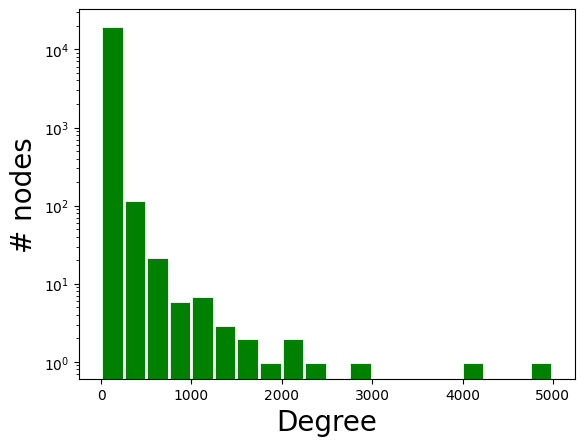

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.7121090448518412, 
its standard error sigma: 0.07415967486514553, 
k_min: 124.0


(2.7121090448518412, 0.07415967486514553, 124.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 2.6087724707365315e-05.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.8666520306589659.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_kobe_23-23_43.pdf
../data/figure/degree_distribution/pdfccdf2_kobe_23-23_43.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.7121090448518412, 
its standard error sigma: 0.07415967486514553, 
k_min: 124.0


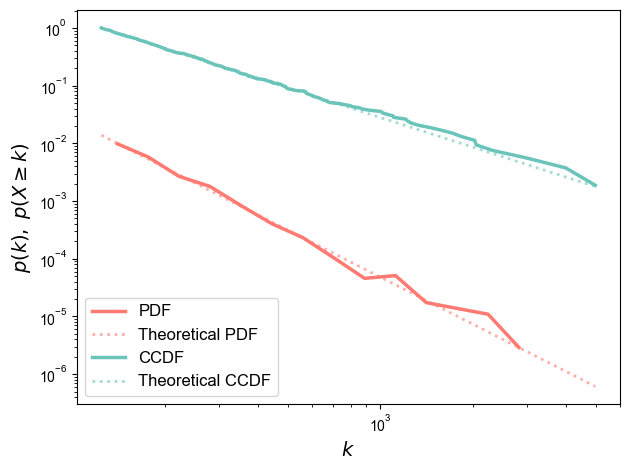

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.7121090448518412, 
its standard error sigma: 0.07415967486514553, 
k_min: 124.0


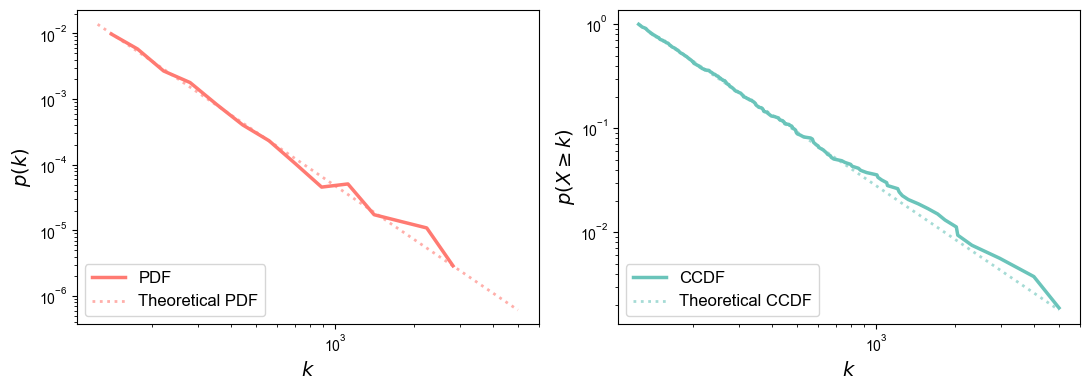

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')